In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
wnba = pd.read_csv('wnba.csv')
parameter = wnba['Games Played'].max()
sample = wnba['Games Played'].sample(30, random_state = 1)
statistic = sample.max()
sampling_error = parameter - statistic

In [2]:
wnba.head()

Name Team  Pos  Height  Weight        BMI Birth_Place  \
0    Aerial Powers  DAL    F     183    71.0  21.200991          US   
1      Alana Beard   LA  G/F     185    73.0  21.329438          US   
2     Alex Bentley  CON    G     170    69.0  23.875433          US   
3  Alex Montgomery  SAN  G/F     185    84.0  24.543462          US   
4     Alexis Jones  MIN    G     175    78.0  25.469388          US   

           Birthdate  Age         College ...  OREB  DREB  REB  AST  STL  BLK  \
0   January 17, 1994   23  Michigan State ...     6    22   28   12    3    6   
1       May 14, 1982   35            Duke ...    19    82  101   72   63   13   
2   October 27, 1990   26      Penn State ...     4    36   40   78   22    3   
3  December 11, 1988   28    Georgia Tech ...    35   134  169   65   20   10   
4     August 5, 1994   23          Baylor ...     3     9   12   12    7    0   

   TO  PTS  DD2  TD3  
0  12   93    0    0  
1  40  217    0    0  
2  24  218    0    0  
3  38  188    2    0  
4  14   50    0    0  

[5 rows x 32 columns]

In [3]:
wnba.tail()

Name Team  Pos  Height  Weight        BMI Birth_Place  \
138     Tiffany Hayes  ATL    G     178    70.0  22.093170          US   
139   Tiffany Jackson   LA    F     191    84.0  23.025685          US   
140  Tiffany Mitchell  IND    G     175    69.0  22.530612          US   
141      Tina Charles   NY  F/C     193    84.0  22.550941          US   
142     Yvonne Turner  PHO    G     175    59.0  19.265306          US   

              Birthdate  Age         College ...  OREB  DREB  REB  AST  STL  \
138  September 20, 1989   27     Connecticut ...    28    89  117   69   37   
139      April 26, 1985   32           Texas ...     5    18   23    3    1   
140  September 23, 1984   32  South Carolina ...    16    70   86   39   31   
141        May 12, 1988   29     Connecticut ...    56   212  268   75   21   
142    October 13, 1987   29        Nebraska ...    11    13   24   30   18   

     BLK  TO  PTS  DD2  TD3  
138    8  50  467    0    0  
139    3   8   28    0    0  
140    5  40  277    0    0  
141   22  71  582   11    0  
142    1  32  151    0    0  

[5 rows x 32 columns]

In [4]:
sample_means = []
population_mean = wnba['PTS'].mean()

for i in range(100):
    sample = wnba['PTS'].sample(10, random_state=i)
    sample_means.append(sample.mean())

In [5]:
sample2_means = []
population2_mean = wnba['PTS'].mean()

for i in range(50):
    sample2 = wnba['PTS'].sample(10, random_state=i)
    sample2_means.append(sample.mean())

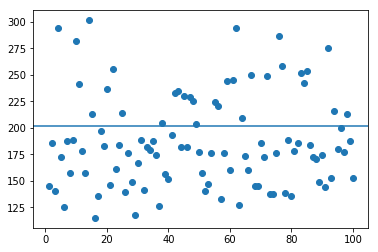

In [6]:
plt.scatter(range(1,101), sample_means)
plt.axhline(population_mean)

In [7]:
Point_Per_Game = wnba['Pts_per_game'] = wnba['PTS'] / wnba['Games Played']

# Stratifying the data in five strata
stratum_G = wnba[wnba.Pos == 'G']
stratum_F = wnba[wnba.Pos == 'F']
stratum_C = wnba[wnba.Pos == 'C']
stratum_GF = wnba[wnba.Pos == 'G/F']
stratum_FC = wnba[wnba.Pos == 'F/C']

points_per_position = {}
for stratum, position in [(stratum_G, 'G'), (stratum_F, 'F'), (stratum_C, 'C'),
                (stratum_GF, 'G/F'), (stratum_FC, 'F/C')]:
    
    sample = stratum['Pts_per_game'].sample(10, random_state = 0) # simple random sapling on each stratum
    points_per_position[position] = sample.mean()
    
position_most_points = max(points_per_position, key = points_per_position.get)

In [8]:
print(wnba['Team'].unique())

['DAL' 'LA' 'CON' 'SAN' 'MIN' 'SEA' 'PHO' 'CHI' 'WAS' 'NY' 'ATL' 'IND']


In [9]:
print(wnba['Games Played'].value_counts(bins = 3, normalize = True) * 100)

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64


In [10]:
under_12 = wnba[wnba['Games Played'] <= 12]
btw_13_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
over_23 = wnba[wnba['Games Played'] > 22]

proportional_sampling_means = []

for i in range(100):
    sample_under_12 = under_12['PTS'].sample(1, random_state = i) #number indicates number of samples
    sample_btw_13_22 = btw_13_22['PTS'].sample(2, random_state = i)
    sample_over_23 = over_23['PTS'].sample(7, random_state = i)
    
    final_sample = pd.concat([sample_under_12, sample_btw_13_22, sample_over_23])
    proportional_sampling_means.append(final_sample.mean())

In [11]:
final_sample

0       93
119     96
54      13
76     411
60     200
27     228
58     364
107     96
10     244
135    217
Name: PTS, dtype: int64

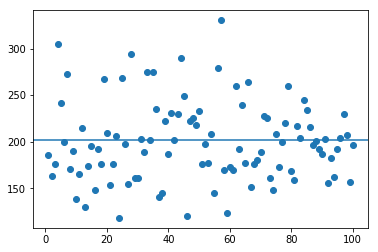

In [12]:
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())

In [13]:
wnba['MIN'].value_counts(bins = 6, normalize = True)

(682.667, 850.333]    0.188811
(347.333, 515.0]      0.181818
(10.993, 179.667]     0.181818
(515.0, 682.667]      0.167832
(179.667, 347.333]    0.153846
(850.333, 1018.0]     0.125874
Name: MIN, dtype: float64

In [14]:
print(wnba['Team'].unique())

['DAL' 'LA' 'CON' 'SAN' 'MIN' 'SEA' 'PHO' 'CHI' 'WAS' 'NY' 'ATL' 'IND']


In [15]:
print(pd.Series(wnba['Team'].unique()).sample(10, random_state = 0))

6     PHO
11    IND
4     MIN
10    ATL
2     CON
8     WAS
1      LA
7     CHI
9      NY
3     SAN
dtype: object


In [16]:
clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)

sample = pd.DataFrame()

for cluster in clusters:
    data_collected = wnba[wnba['Team'] == cluster]
    sample = sample.append(data_collected)

sampling_error_height = wnba['Height'].mean() - sample['Height'].mean()
sampling_error_age = wnba['Age'].mean() - sample['Age'].mean()
sampling_error_BMI = wnba['BMI'].mean() - sample['BMI'].mean()
sampling_error_points = wnba['PTS'].mean() - sample['PTS'].mean()

In [17]:
age_ascending = wnba['Age'].value_counts().sort_index(ascending = True)
age_descending = wnba['Age'].value_counts().sort_index(ascending = False)

In [18]:
def make_pts_ordinal(row):
    if row['PTS'] <= 20:
        return 'very few points'
    if (20 < row['PTS'] <=  80):
        return 'few points'
    if (80 < row['PTS'] <=  150):
        return 'many, but below average'
    if (150 < row['PTS'] <= 300):
        return 'average number of points'
    if (300 < row['PTS'] <=  450):
        return 'more than average'
    else:
        return 'much more than average'

In [19]:
wnba['PTS_ordinal_scale'] = wnba.apply(make_pts_ordinal, axis = 1)

# Type your answer below
pts_ordinal_desc = wnba['PTS_ordinal_scale'].value_counts().sort_index(ascending = False) #iloc is also an option

In [20]:
pts_ordinal_desc

very few points             12
much more than average      13
more than average           21
many, but below average     25
few points                  27
average number of points    45
Name: PTS_ordinal_scale, dtype: int64

In [21]:
print(wnba['Pos'].value_counts() / len(wnba))

G      0.419580
F      0.230769
C      0.174825
G/F    0.090909
F/C    0.083916
Name: Pos, dtype: float64


In [22]:
print(wnba['Pos'].value_counts(normalize = True) * 100)

G      41.958042
F      23.076923
C      17.482517
G/F     9.090909
F/C     8.391608
Name: Pos, dtype: float64


In [23]:
percentages = wnba['Age'].value_counts(normalize = True).sort_index() * 100
proportion_25 = percentages[25] / 100
percentage_30 = percentages[30]
percentage_over_30 = percentages.loc[30:].sum()
percentage_below_23 = percentages.loc[:23].sum()

In [24]:
from scipy.stats import percentileofscore
percentile_rank_half_less = percentileofscore(wnba['Games Played'], 17, kind = 'weak')
percentage_half_more = 100 - percentile_rank_half_less

In [25]:
print(wnba['Age'].describe()) #returns 25, 50, & 75 percentages as well. Use iloc[] to isolate outputs on rows

count    143.000000
mean      27.076923
std        3.679170
min       21.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       36.000000
Name: Age, dtype: float64


In [26]:
print(wnba['Age'].describe(percentiles = [.1, .15, .33, .5, .592, .85, .9]).iloc[3:])

min      21.0
10%      23.0
15%      23.0
33%      25.0
50%      27.0
59.2%    28.0
85%      31.0
90%      32.0
max      36.0
Name: Age, dtype: float64


In [27]:
percentiles = wnba['Age'].describe(percentiles = [.5, .75, .95])
age_upper_quartile = percentiles['75%']
age_middle_quartile = percentiles['50%']
age_95th_percentile = percentiles['95%']

In [28]:
grouped_freq_table = wnba['PTS'].value_counts(bins = 10, normalize = True).sort_index(ascending = False) * 100

In [29]:
grouped_freq_table

(525.8, 584.0]     3.496503
(467.6, 525.8]     2.797203
(409.4, 467.6]     5.594406
(351.2, 409.4]     6.993007
(293.0, 351.2]     5.594406
(234.8, 293.0]    11.888112
(176.6, 234.8]    13.986014
(118.4, 176.6]    11.888112
(60.2, 118.4]     16.783217
(1.417, 60.2]     20.979021
Name: PTS, dtype: float64

In [30]:
grouped_freq_table_2 = wnba['PTS'].value_counts(bins = 10, normalize = True).sort_index(ascending = False)

In [31]:
intervals = pd.interval_range(start = 0, end = 600, freq = 60)
gr_freq_table_10 = pd.Series([0 for _ in range(10)], index = intervals)

for value in wnba['PTS']:
    for interval in intervals:
        if value in interval:
            gr_freq_table_10.loc[interval] += 1
            break

In [32]:
gr_freq_table_10

(0, 60]       30
(60, 120]     25
(120, 180]    17
(180, 240]    22
(240, 300]    15
(300, 360]     7
(360, 420]    11
(420, 480]     7
(480, 540]     4
(540, 600]     5
dtype: int64

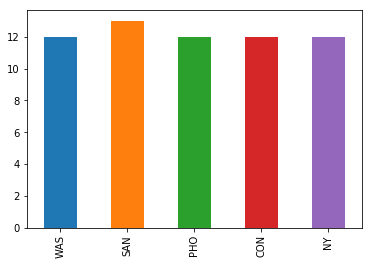

In [33]:
wnba['Team'].value_counts().iloc[[3,0,2,1,4]].plot.bar()

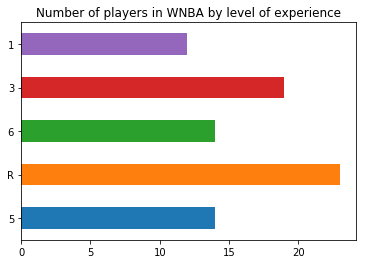

In [34]:
wnba['Experience'].value_counts().iloc[[3,0,2,1,4]].plot.barh(
    title = 'Number of players in WNBA by level of experience')

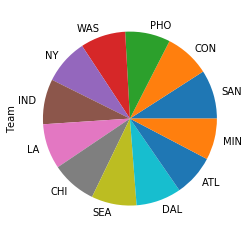

In [35]:
wnba['Team'].value_counts().plot.pie()

In [36]:
print(wnba['Team'].iloc[[3,0,2,1,4]])

3    SAN
0    DAL
2    CON
1     LA
4    MIN
Name: Team, dtype: object


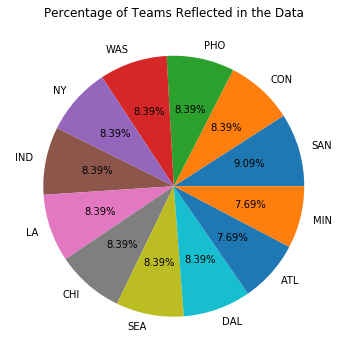

In [37]:
wnba['Team'].value_counts().plot.pie(figsize = (6,6), autopct = '%.2f%%',
                                    title = 'Percentage of Teams Reflected in the Data')
plt.ylabel(''); #autopct calculates .2 or two decimal places

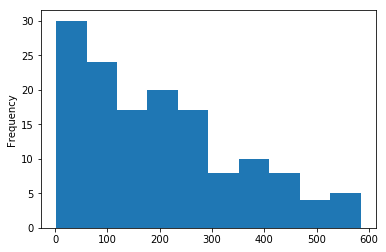

In [38]:
wnba['PTS'].plot.hist()

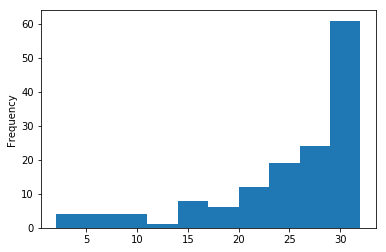

In [39]:
wnba['Games Played'].plot.hist()

Text(0.5, 0, 'Points')

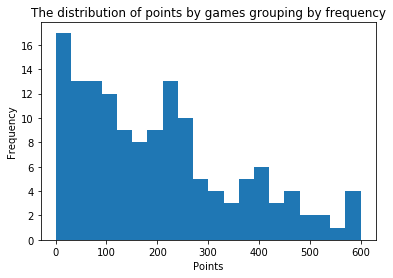

In [40]:
wnba['PTS'].plot.hist(range = (1,600), bins = 20,
                               title = 'The distribution of points by games grouping by frequency')
plt.xlabel('Points')

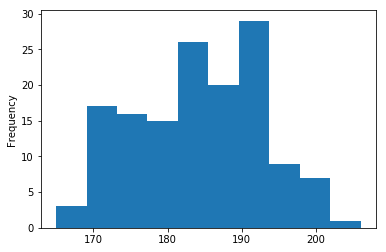

In [41]:
wnba['Height'].plot.hist() #'normal_distribution model'

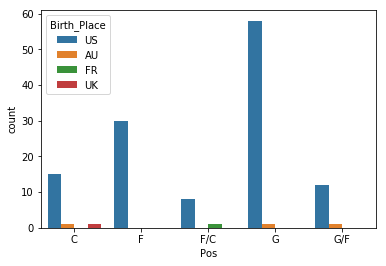

In [42]:
sns.countplot(x = 'Pos', hue = 'Birth_Place', data = wnba,
              order = ['C', 'F', 'F/C', 'G', 'G/F'],
              hue_order = ['US','AU','FR', 'UK']
             )

In [43]:
print(wnba['Birth_Place'].unique())

['US' 'SE' 'JM' 'AU' 'BR' 'BE' 'NG' 'PR' 'BS' 'CA' 'SN' 'JP' 'ES' 'FR'
 'UK']


In [44]:
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else
                                           'below average')

In [45]:
wnba['MIN'].mean()

496.97202797202794

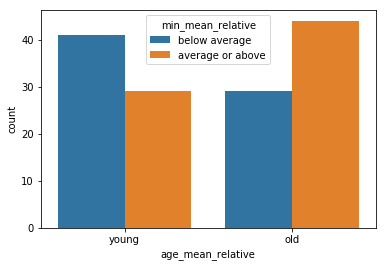

In [46]:
sns.countplot(x = 'age_mean_relative', hue = 'min_mean_relative', data = wnba)
result = 'rejection'

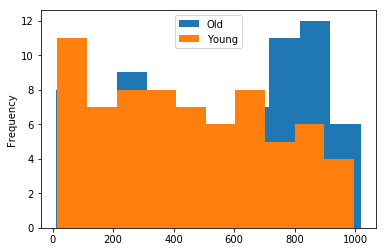

In [47]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(label = 'Young', legend = True)

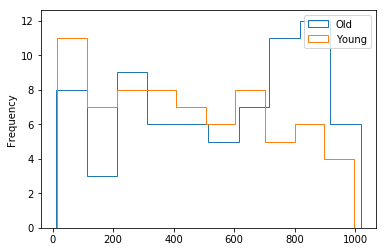

In [48]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True)

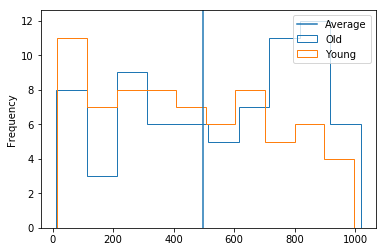

In [52]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True)
plt.axvline(497, label = 'Average')
plt.legend()

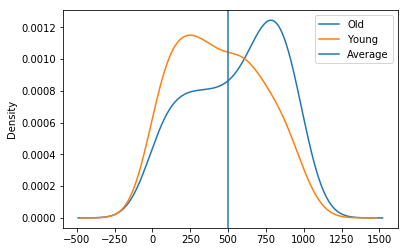

In [53]:
#Display kernel density plots display densities on the y-axis instead of frequencies.

wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)
plt.axvline(497, label = 'Average')
plt.legend()

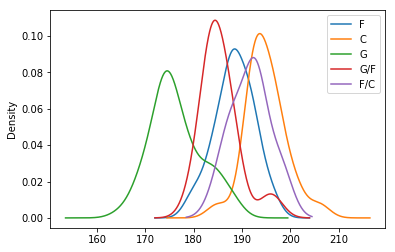

In [54]:
wnba[wnba.Pos == 'F']['Height'].plot.kde(label = 'F', legend = True)
wnba[wnba.Pos == 'C']['Height'].plot.kde(label = 'C', legend = True)
wnba[wnba.Pos == 'G']['Height'].plot.kde(label = 'G', legend = True)
wnba[wnba.Pos == 'G/F']['Height'].plot.kde(label = 'G/F', legend = True)
wnba[wnba.Pos == 'F/C']['Height'].plot.kde(label = 'F/C', legend = True)

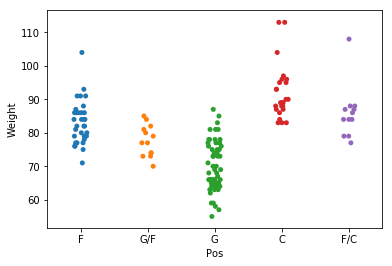

In [55]:
sns.stripplot(x = 'Pos', y = 'Weight', data = wnba, jitter = True) #jitter prevents bullets from overlaping

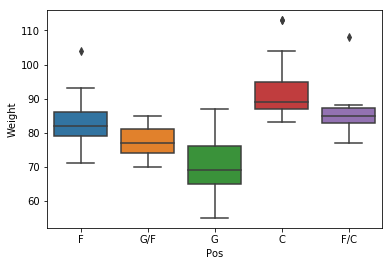

In [56]:
sns.boxplot(x = 'Pos', y = 'Weight', data = wnba)

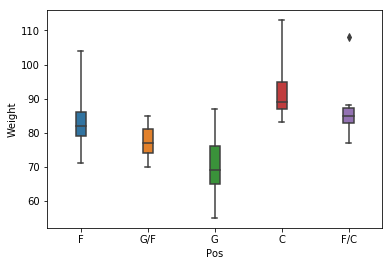

In [58]:
sns.boxplot(x = 'Pos', y = 'Weight', data = wnba, whis =4, orient = 'vertical', width = .15)

In [59]:
print(wnba['Games Played'].describe())

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64


In [66]:
iqr = 29 - 22
lower_bound = 22 - (1.5 * iqr)
upper_bound = 29 + (1.5 * iqr)
outliers_low = sum(wnba['Games Played'] < lower_bound) # True values will count as 1 in the summation
outliers_high = sum(wnba['Games Played'] > upper_bound)

In [67]:
outliers_high

0

In [68]:
upper_bound

39.5

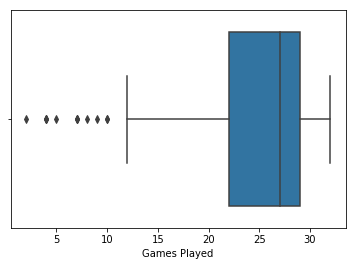

In [63]:
sns.boxplot(wnba['Games Played'])